In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from random import randint
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [53]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    y_actual = list(y_actual)
    y_hat = list(y_hat)
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1


def f_measure(y_true, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    y_true = list(y_true)
    y_pred = list(y_pred)
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_true[i] == y_pred[i]:
            TP = TP + 1
    
    for i in range(len(y_true)):
        if y_true[i] == 0 and y_true[i] != y_pred[i]:
            FP = FP + 1

    for i in range(len(y_true)):
        if y_true[i] == 0 and y_true[i] == y_pred[i]:
            TN = TN + 1

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_true[i] != y_pred[i]:
            FN = FN + 1
    
    czulosc = TP/(TP+FN)
    specyfikacje = TN/(TN+FP)
    dokladnosc = (TP+TN)/(TP+TN+FP+FN)
    precyzja = TP/(TP+FP)

    return czulosc, specyfikacje, dokladnosc, precyzja



In [3]:
diabetes = pd.read_csv('diabetes.csv', sep=',')
# bins = (2,6.5,8)
# group_names = ['bad','good']
# diabetes['Outcome'] = pd.cut(diabetes['Outcome'], bins=bins, labels=group_names)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

[[78 21]
 [19 36]]


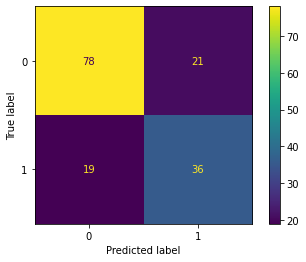

In [4]:
# RFC
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
# sprawdzanie jak działa model
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
plot_confusion_matrix(rfc, X_test, y_test)

In [5]:
# SVM Klasyfikator
svc=SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test,pred_svc))
# plot_confusion_matrix(svc_clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

[[82 17]
 [24 31]]


In [6]:
# Sieci neuronowe
mlpc = MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

[[75 24]
 [17 38]]


In [7]:
# Drzewo decyzyjne
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print(classification_report(y_test,pred_tree))
print(confusion_matrix(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

[[76 23]
 [18 37]]


In [8]:
# K sasiadow
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

[[79 20]
 [27 28]]


In [54]:
cm = accuracy_score(y_test, pred_rfc)
print(cm)
cm = accuracy_score(y_test, pred_svc)
print(cm)
cm = accuracy_score(y_test, pred_mlpc)
print(cm)
cm = accuracy_score(y_test, pred_tree)
print(cm)
cm = accuracy_score(y_test, pred_knn)
print(cm)

print(f_measure(y_test,pred_tree))
print(perf_measure(y_test,pred_tree))

0.7402597402597403
0.7337662337662337
0.7337662337662337
0.7337662337662337
0.6428571428571429
(37, 23, 76, 18)
(0.6727272727272727, 0.7676767676767676, 0.7337662337662337, 0.6166666666666667)


In [10]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
Xnew = [[1,	89,	66	,23,	94,	28.1,	0.167,	21	]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0], dtype=int64)

          0         1         2         3         4         5         6  \
0 -0.526397 -1.151398 -3.752683 -1.322774 -0.701206 -4.135256 -0.490735   
1  1.588046 -0.276643  0.680345  0.233505 -0.701206 -0.489169  2.415030   
2 -0.828460  0.566871 -1.265862 -0.090720  0.013448 -0.424522  0.549161   
3 -1.130523  1.254179 -1.049617 -1.322774 -0.701206 -1.303720 -0.639291   
4  0.681856  0.410665  0.572222  1.076490  2.484601  1.838121 -0.686829   

          7  
0 -1.035940  
1  1.487101  
2 -0.948939  
3  2.792122  
4  1.139095  
          0         1
0 -4.941712 -0.525098
1  0.915510  1.773579
2 -0.634276 -1.153893
3 -1.103808  2.031867
4  2.900033  0.060172
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        99
           1       0.50      0.45      0.48        55

    accuracy                           0.64       154
   macro avg       0.61      0.60      0.60       154
weighted avg       0.64      0.64      0.64       154

[[74 2

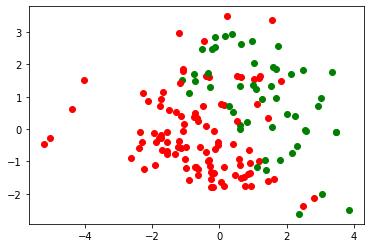

In [56]:
# redukcja wymiaru PCA (uzywaj na X_test i X_train przed fitowaniem)
pca = PCA(n_components=2)
transform_train = pca.fit_transform(X_train)
transform_test = pca.transform(X_test)

df1 = pd.DataFrame(data = X_train)
print(df1.head())
df2 = pd.DataFrame(data = transform_train)
print(df2.head())

knn = KNeighborsClassifier()
knn.fit(transform_train,y_train)
pred_knn = knn.predict(transform_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

print(pred_knn)
transform_test = list(transform_test)
pred_knn = list(pred_knn)
t1 = []
t2 = []
for i in range(len(transform_test)):
    t1.append(transform_test[i][0])
    t2.append(transform_test[i][1])
    if float(pred_knn[i]) == float(1):
        plt.scatter(t1[i],t2[i], color='g', label='1')
    else:
        plt.scatter(t1[i],t2[i], color='r', label='0')



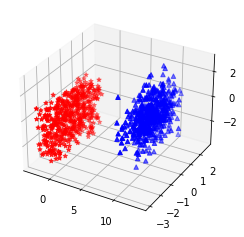

,x,y,z
0,-2.559340,0.432367,-1.919491
1,0.286225,0.273209,-2.921442
2,-1.949353,-2.511043,-0.968535
3,-2.836023,-1.903860,0.074966
4,-2.218524,-1.565674,-0.020418


In [63]:
# Generacja syntetycznych danych
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy.random as npr

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

n = 500

x1 = 4* npr.rand(n) - 3
y1 = 4* npr.rand(n) - 3
z1 = 4* npr.rand(n) - 3

x2 = npr.randn(n) + 10
y2 = npr.randn(n)
z2 = npr.randn(n)

ax.scatter(x1,y1,z1, c='r', marker = '*')
ax.scatter(x2,y2,z2, c='blue', marker = '^')

plt.show()

df = pd.DataFrame(data=[x1,y1,z1])
df = df.T
df.columns = ['x','y','z']
df.head()